In [3]:
# Various imports, setup
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [4]:
################
# Read in Data #
################
# For source see '../src/data_sources'

# USGS; 1980 to today, only 6.5+ quakes. 
usgs_quakes = pd.read_csv('../data/raw/usgs_1980_6_5_above.csv')

# NOAA; I think its 1980 to today - josh
noaa_quakes = pd.read_csv('../data/raw/noaa_quakes.tsv', sep='\t')

In [21]:
# Look at the available features

for col in noaa_quakes.columns:
    print(col)

Search Parameters
Year
Mo
Dy
Hr
Mn
Sec
Tsu
Vol
Location Name
Latitude
Longitude
Focal Depth (km)
Mag
MMI Int
Deaths
Death Description
Missing
Missing Description
Injuries
Injuries Description
Damage ($Mil)
Damage Description
Houses Destroyed
Houses Destroyed Description
Houses Damaged
Houses Damaged Description
Total Deaths
Total Death Description
Total Missing
Total Missing Description
Total Injuries
Total Injuries Description
Total Damage ($Mil)
Total Damage Description
Total Houses Destroyed
Total Houses Destroyed Description
Total Houses Damaged
Total Houses Damaged Description


# The Three Hypothesis

### Hypothesis 1:  The world in general is getting better at reducing deaths during an earthquake
- Are earthquake deaths correlated with time? 
- Is the world generally more prepared for earthquakes as time goes on?

### Hypothesis 2: Earthquake magnitude and deaths are highly related across countries
- What countries have the worst earthquakes?
- Grouping by location, is there strong evidence that magnitude of an earthquake is highly related to deaths regardless of where the earthquake takes place?

# Hypothesis 1
- First we subset the data to only work with the variables we are interested in
- Then, we take a look at the shape, a correlation matrix, and the unique counts of some of the variables to inform how we will build our visualization



In [5]:
# Subset just the variables we want for this analysis
data_h1 = noaa_quakes[['Year', 'Mag', 'Total Deaths', 'Deaths', 'Damage ($Mil)', 'Total Missing', 'Total Injuries']]
# remove NA for outcome of interest
data_h1 = data_h1[data_h1['Total Deaths'].notna()]
data_h1.shape


(814, 7)

In [6]:
data_h1.corr()

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
Year,1.000000,-0.029346,0.013584,0.012125,0.087566,-0.494449,0.009952
Mag,-0.029346,1.000000,0.127745,0.083345,0.179557,-0.447308,0.141558
Total Deaths,0.013584,0.127745,1.000000,0.832922,0.209509,0.399351,0.794430
Deaths,0.012125,0.083345,0.832922,1.000000,0.215684,0.221591,0.795155
Damage ($Mil),0.087566,0.179557,0.209509,0.215684,1.000000,0.260949,0.492195
Total Missing,-0.494449,-0.447308,0.399351,0.221591,0.260949,1.000000,0.463407
Total Injuries,0.009952,0.141558,0.794430,0.795155,0.492195,0.463407,1.000000


In [17]:
# data_h1['Year'].value_counts()

## The First plot for Hypothesis 1
- We noticed that the chart was very large and somewhat sparse. It is hard to view the whole plot in one window.
- We decided to plot another correlation heatmap. We were surprised to see that magnitude is very negatively related to total missing. This means that higher magnitude earthquakes generally have lower numbers of missing in the data. We think this is likely due to skewed data with many outliers. 
- We found that two earthquakes that occured in 2004 and 2010 we major outliers with far more deaths than the rest of the quakes

In [33]:
# First chart
alt.Chart(data_h1).mark_rect().encode(
    x='Year:N',
    y=alt.Y('Mag:N', scale=alt.Scale(reverse=True)),
    color='Total Deaths:Q'
)

alt.Chart(...)

<AxesSubplot:>

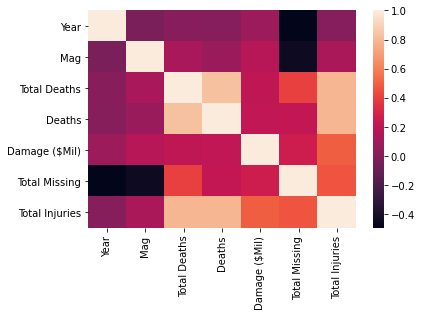

In [9]:
corr = data_h1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# As years increase, total number missing decreases


In [10]:
data_h1.describe()
# Deaths outlier

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
count,814.000000,812.000000,814.000000,795.000000,269.000000,23.000000,625.000000
mean,2002.313268,6.139409,1224.626536,935.232704,2196.067208,182.304348,2758.996800
std,11.956518,1.008043,14410.850090,12142.857550,9152.814569,396.996386,21801.681694
min,1980.000000,1.600000,1.000000,1.000000,0.300000,1.000000,1.000000
25%,1992.000000,5.500000,1.000000,1.000000,5.000000,4.000000,17.000000
50%,2003.000000,6.100000,4.000000,4.000000,58.700000,17.000000,73.000000
75%,2013.000000,6.800000,24.000000,22.000000,660.000000,126.000000,348.000000
max,2021.000000,9.100000,316000.000000,316000.000000,100000.000000,1755.000000,374171.000000


In [11]:
# Definitely an outlier in 2010 and 2004 that were very deadly
data_h1.sort_values('Total Deaths')

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries
828,2003.0,6.5,1.0,1.0,NaN,NaN,21.0
1091,2007.0,5.1,1.0,1.0,NaN,NaN,NaN
1090,2007.0,5.1,1.0,1.0,NaN,NaN,5.0
1088,2007.0,4.8,1.0,1.0,NaN,NaN,12.0
1050,2007.0,6.7,1.0,1.0,NaN,NaN,150.0
...,...,...,...,...,...,...,...
342,1990.0,7.3,40000.0,40000.0,7200.0,NaN,105000.0
964,2005.0,7.6,76213.0,76213.0,6680.0,NaN,146599.0
1132,2008.0,7.9,87652.0,87652.0,86000.0,NaN,374171.0
916,2004.0,9.1,227899.0,1001.0,10000.0,NaN,NaN


## The last plot for Hypothesis 1

- Since the above heatmap was so sparse, we will now bin the magnitude into 0.5 intervals in order to aggregate some of the data and compress the plot
- Additionally, we changed the color scale to red

In [34]:
bins = np.arange(start=0.5, stop=10, step=0.5)
bins

data_h1['Magnitude Bin'] = (np.digitize(data_h1['Mag'], bins, right=True)+1)/2

#data_h1.head()
#df['quarter'] = np.digitize(df['month'], [3, 6, 9], right=True) + 1


data_h1.head()

,Year,Mag,Total Deaths,Deaths,Damage ($Mil),Total Missing,Total Injuries,Magnitude Bin
1,1980.0,6.9,69.0,69.0,5.0,NaN,600.0,7.0
7,1980.0,5.2,61.0,NaN,NaN,NaN,NaN,5.5
10,1980.0,6.4,1.0,1.0,NaN,NaN,100.0,6.5
13,1980.0,6.4,1.0,1.0,5.0,NaN,NaN,6.5
15,1980.0,4.0,1.0,1.0,5.0,NaN,17.0,4.0


In [35]:
alt.Chart(data_h1).mark_rect().encode(
    x='Year:N',
    y=alt.Y('Magnitude Bin:N', scale=alt.Scale(reverse=True)),
    color=alt.Color('Total Deaths:Q', scale=alt.Scale(scheme='reds'))
)

alt.Chart(...)

In [73]:
# Subset to all fatal earthquakes with less than 100K deaths
data_h1_fatal = data_h1[data_h1['Total Deaths'] > 0]
data_h1_not2big = data_h1_fatal[data_h1_fatal['Total Deaths'] < 100000]

In [74]:
alt.Chart(data_h1_not2big).mark_rect().encode(
    x='Year:N',
    y=alt.Y('Magnitude Bin:N', scale=alt.Scale(reverse=True)),
    color=alt.Color('Total Deaths:Q', scale=alt.Scale(scheme='reds'))
)

alt.Chart(...)

# Hypothesis 2
- First we subset the data to variables of interest
- Then we remove all NAs to make sure we have complete data

In [24]:
data_h2 = noaa_quakes[['Year', 'Mag', 'Total Deaths', 'Location Name']]
# Remove NA (removes over 1000 observations, out of 1800)
data_h2 = data_h2.dropna()

## The First Plot for Hypothesis 2
- First we created a simple scatter plot with  Total Deaths on the vertical axis and Magnitude on the horizontal axis 
- There are far too many categories in the legend, many of them are very similar

In [76]:
alt.Chart(data_h2).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location Name', legend=alt.Legend(title='Location')),
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
)


alt.Chart(...)

## Second Plot for Hypothesis 2
- Next we will take only the first word of `Location Name` and copy that into a new feature called 'Location'. Instead of 702 legend entries, there will be 81
- 81 entries is still too many to understand and some colors are repeated. The outliers are easy to look at but there are many points smashed at the bottom of the plot


In [78]:
# Create new feature called `Location`. Takes the first word from 'Location Name'
data_h2 = data_h2.assign(Location=data_h2['Location Name'].str.split(':').str[0])

In [79]:
alt.Chart(data_h2).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
)

alt.Chart(...)

## Third Plot for Hypothesis 2
- Since the points were so hard to identify in the last plot, we added a Tooltip and interactivity so we can identify some of the points. 
- We also made the points smaller so they wouldn't overlap as much
- Now we can zoom in and start to inspect individual points. However, the tooltip only provides the data that is on the graph already

In [80]:
alt.Chart(data_h2).mark_circle(filled=True, 
                                size=100, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Mag', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

## Fourth Plot for Hypothesis 2
- Next, we added more information in the tooltip. Instead of including the truncated location variable created above, we will include the full location name. To better examine this data in the context of our hypothesis, we will also add the Year.
- Still a lot of the data is clumped at the bottom.

In [84]:
alt.Chart(data_h2).mark_circle(filled=True, 
                                size=100, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location Name', 'Year', 'Mag', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

## Fifth plot for Hypothesis 2

- Now we want to look at fatal earthquakes. So far it looks like earthquake deaths are not related to magnitude due to so many non fatal earthquakes
- Now we'll subset the data to only fatal earthquakes

In [82]:

data_h2_fatal = data_h2[data_h2['Total Deaths'] > 0]

In [83]:
alt.Chart(data_h2_fatal).mark_circle(filled=True, 
                                size=100, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location Name', 'Year', 'Mag', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake test',
    width=600,
    height=400
).interactive()

alt.Chart(...)

## Final Plot for Hypothesis 2
- There are still many bunched around at the bottom. Even for Fatal earthquakes, it looks like our intiial hypothesis is incorrect and there is no simple relationship between deaths and magnitude across countries
- However, we still want to investigate the most fatal earthquakes, so now we subset the data to only include earthquakes with over 10,000 deaths

In [85]:
data_h2_bigones = data_h2[data_h2['Total Deaths'] > 10000]

In [86]:
alt.Chart(data_h2_bigones).mark_circle(filled=True, 
                                size=100, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Mag', title='Magnitude'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location Name', 'Year', 'Mag', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake test',
    width=600,
    height=400
).interactive()

alt.Chart(...)

Here among the most devastating earthquakes, it does appear there is a relationship between the magnitude and the total deaths. However this relationship appears to be weak if it exists at all.

### Hypothesis 3: Deeper earthquake cause more damage.
-How correlated is depth with damage/deaths/magnitude?
<br> -Do certain areas get deeper earthquakes? (increased death may not be because of depth, but might be because deeper earthquakes hit less-prepared areas more often?)



In [8]:
noaa_depth = noaa_quakes[['Focal Depth (km)', 'Mag', 'Total Deaths',
       'Total Missing', 'Total Injuries','Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Houses Damaged']]
noaa_depth = noaa_quakes.assign(Location=noaa_quakes['Location Name'].str.split(':').str[0])
#data_h2 = data_h2.assign(Location=data_h2['Location Name'].str.split(':').str[0])
noaa_depth.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Location
0,"[""1980 <= Year >= 2021""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1980.0,1.0,1.0,16.0,42.0,42.0,4259.0,NaN,"AZORES: TERCEIRA, ANGRA DO HEROISMO",...,NaN,600.0,3.0,5.0,2.0,NaN,NaN,NaN,NaN,AZORES
2,NaN,1980.0,1.0,24.0,19.0,0.0,9.5,NaN,NaN,CALIFORNIA: LIVERMORE,...,NaN,50.0,1.0,11.5,3.0,NaN,NaN,NaN,NaN,CALIFORNIA
3,NaN,1980.0,2.0,23.0,5.0,51.0,3.2,2123.0,NaN,RUSSIA: KURIL ISLANDS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUSSIA
4,NaN,1980.0,4.0,16.0,12.0,18.0,20.6,NaN,NaN,INDONESIA: JAVA: TASIKMALAJA,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,INDONESIA


In [ ]:
noaa_depth_death = noaa_depth[noaa_depth['Total Deaths'].notnull()]
noaa_depth_death